<a href="https://colab.research.google.com/github/akash-singh-10/Deep-Learning/blob/main/DLA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, models, layers
import matplotlib.pyplot as plt
import random
import numpy as np

In [48]:
mnist_dataset = tf.keras.datasets.mnist

In [49]:
(x_train, y_train),(x_test, y_test) = mnist_dataset.load_data()

In [50]:
len(x_train)

60000

In [51]:
x_train.shape

(60000, 28, 28)

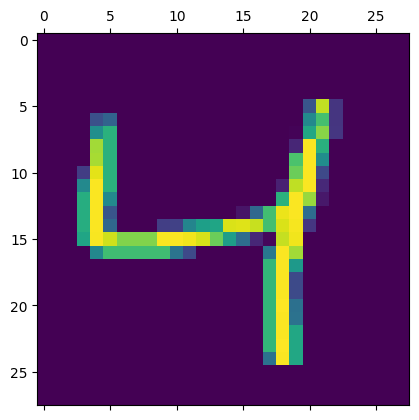

In [52]:
plt.matshow(x_train[2])

In [53]:
x_train = x_train/255
x_test = x_test/255

In [54]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [55]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [57]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6298 - accuracy: 0.8419 - val_loss: 0.3523 - val_accuracy: 0.9052
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3335 - accuracy: 0.9061 - val_loss: 0.2886 - val_accuracy: 0.9182
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.9188 - val_loss: 0.2599 - val_accuracy: 0.9276
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9270 - val_loss: 0.2361 - val_accuracy: 0.9324
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2347 - accuracy: 0.9339 - val_loss: 0.2180 - val_accuracy: 0.9365


In [58]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("loss = %.3f"%test_loss)
print("acc = %.3f"%test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2180 - accuracy: 0.9365
loss = 0.218
acc = 0.937


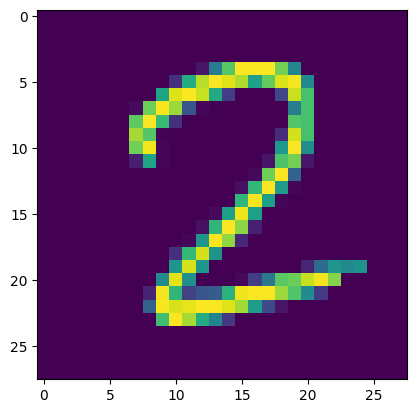

In [59]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [60]:
predicted_value = model.predict(x_test)
print("number in the image is = %d"%np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 1ms/step
number in the image is = 2


In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

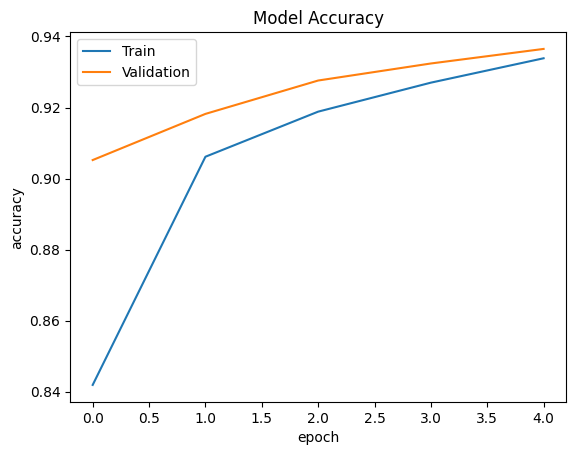

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

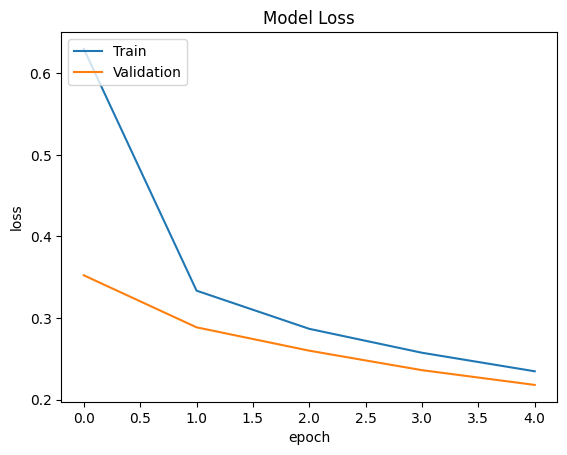

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()